# Clustering method used by OAT

In [1]:
import pandas as pd
import numpy as np
import random
import time

## Importing clustering methods from OAT
from modules.utils.clustering import clustering
from modules.utils.centroid import centroid

df = pd.read_csv(r"../data/preprocessing/distant_clusters.csv", index_col = 0)
df2 = pd.read_csv(r"../data/preprocessing/close_clusters.csv", index_col = 0)

## Creating a column to match the format that work with OAT.
coords = pd.Series([ np.array(df.loc[ID, list("xyz")].to_numpy()) for ID in df.index], index = df.index, name = "coords")
df = pd.concat([df, coords], axis = 1)
df.rename(columns = {"tp": "TP"}, inplace = True)

coords2 = pd.Series([ np.array(df2.loc[ID, list("xyz")].to_numpy()) for ID in df2.index], index = df2.index, name = "coords")
df2 = pd.concat([df2, coords2], axis = 1)
df2.rename(columns = {"tp": "TP"}, inplace = True)

print("------------ 1rst Dataset : ------------")
print(df.head())
print("")
print("------------ 2nd Dataset : -------------") 
print(df2.head())

------------ 1rst Dataset : ------------
           x           y           z   TP  track  objID  target  metaObjID  \
0  50.000000  170.000000  100.000000  0.0    0.0    0.0     NaN        0.0   
1  47.914432  169.798995  101.910551  0.0    1.0    0.0     NaN        0.0   
2  50.348814  169.597990   96.025441  0.0    2.0    0.0     NaN        0.0   
3  52.965600  169.396985  103.868100  0.0    3.0    0.0     NaN        0.0   
4  44.472050  169.195980   99.022183  0.0    4.0    0.0     NaN        0.0   

                                              coords  
0                               [50.0, 170.0, 100.0]  
1  [47.91443219706017, 169.79899497487438, 101.91...  
2  [50.34881428871151, 169.59798994974875, 96.025...  
3  [52.96559965571984, 169.39698492462313, 103.86...  
4  [44.47205005697247, 169.1959798994975, 99.0221...  

------------ 2nd Dataset : -------------
          x          y         z   TP  track  objID  target  metaObjID  \
0  0.000000  25.000000  0.000000  0.0    0.0

## Vizualizing the dataset

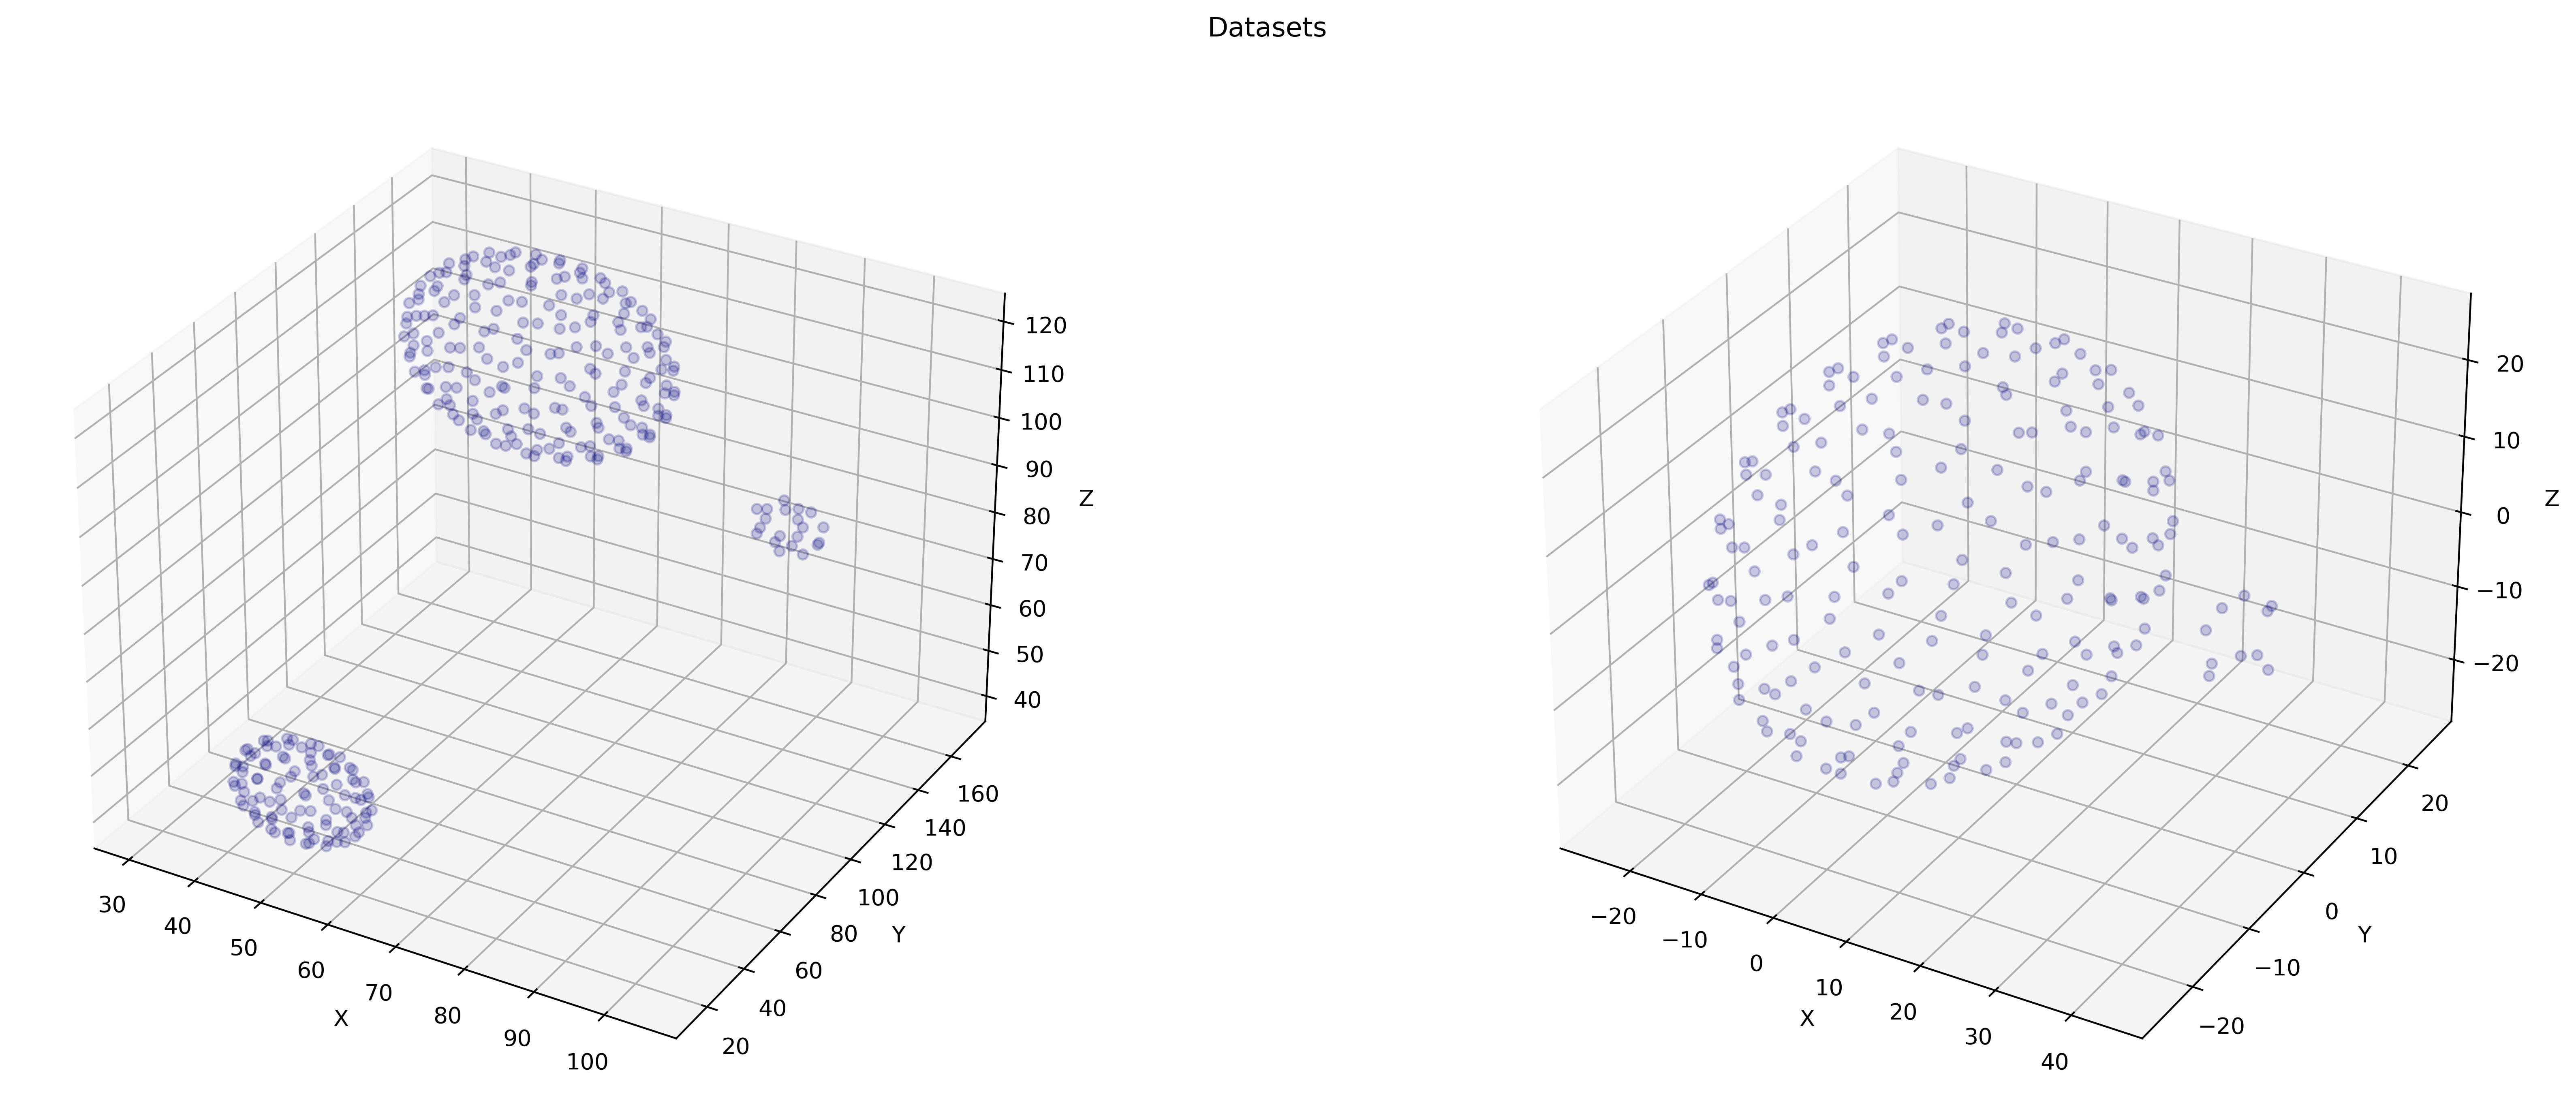

In [2]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

fig = plt.figure( figsize=(20,7), dpi = 400, facecolor = "white" )

ax1 = fig.add_subplot( 121, projection='3d' ); ax1.set_xlabel('X'); ax1.set_ylabel('Y'); ax1.set_zlabel('Z');
ax2 = fig.add_subplot( 122, projection='3d' ); ax2.set_xlabel('X'); ax2.set_ylabel('Y'); ax2.set_zlabel('Z');

## Plotting all data
ax1.scatter(df["x"], df["y"], df["z"], color = "navy", alpha = 0.2)
ax2.scatter(df2["x"], df2["y"], df2["z"], color = "navy", alpha = 0.2)

fig.suptitle("Datasets")
plt.tight_layout()

plt.show()

# Clustering on both datasets

In [11]:
clusters_df = clustering.compute_clusters(df, "coords", clustering_on_distance = True)
clusters_df2 = clustering.compute_clusters(df2, "coords", clustering_on_distance = True)

print(clusters_df)

             x           y           z   TP  track  objID  target  metaObjID  \
0    50.000000  170.000000  100.000000  0.0    0.0    0.0     NaN        0.0   
1    47.914432  169.798995  101.910551  0.0    1.0    0.0     NaN        0.0   
2    50.348814  169.597990   96.025441  0.0    2.0    0.0     NaN        0.0   
3    52.965600  169.396985  103.868100  0.0    3.0    0.0     NaN        0.0   
4    44.472050  169.195980   99.022183  0.0    4.0    0.0     NaN        0.0   
..         ...         ...         ...  ...    ...    ...     ...        ...   
315  49.098217   15.808081   53.833459  0.0  317.0    2.0     NaN        2.0   
316  48.324570   15.606061   47.008874  0.0  318.0    2.0     NaN        2.0   
317  52.672231   15.404040   50.881330  0.0  319.0    2.0     NaN        2.0   
318  48.176413   15.202020   50.821050  0.0  320.0    2.0     NaN        2.0   
319  50.000000   15.000000   50.000000  0.0  321.0    2.0     NaN        2.0   

                                       

## Showing the raw results

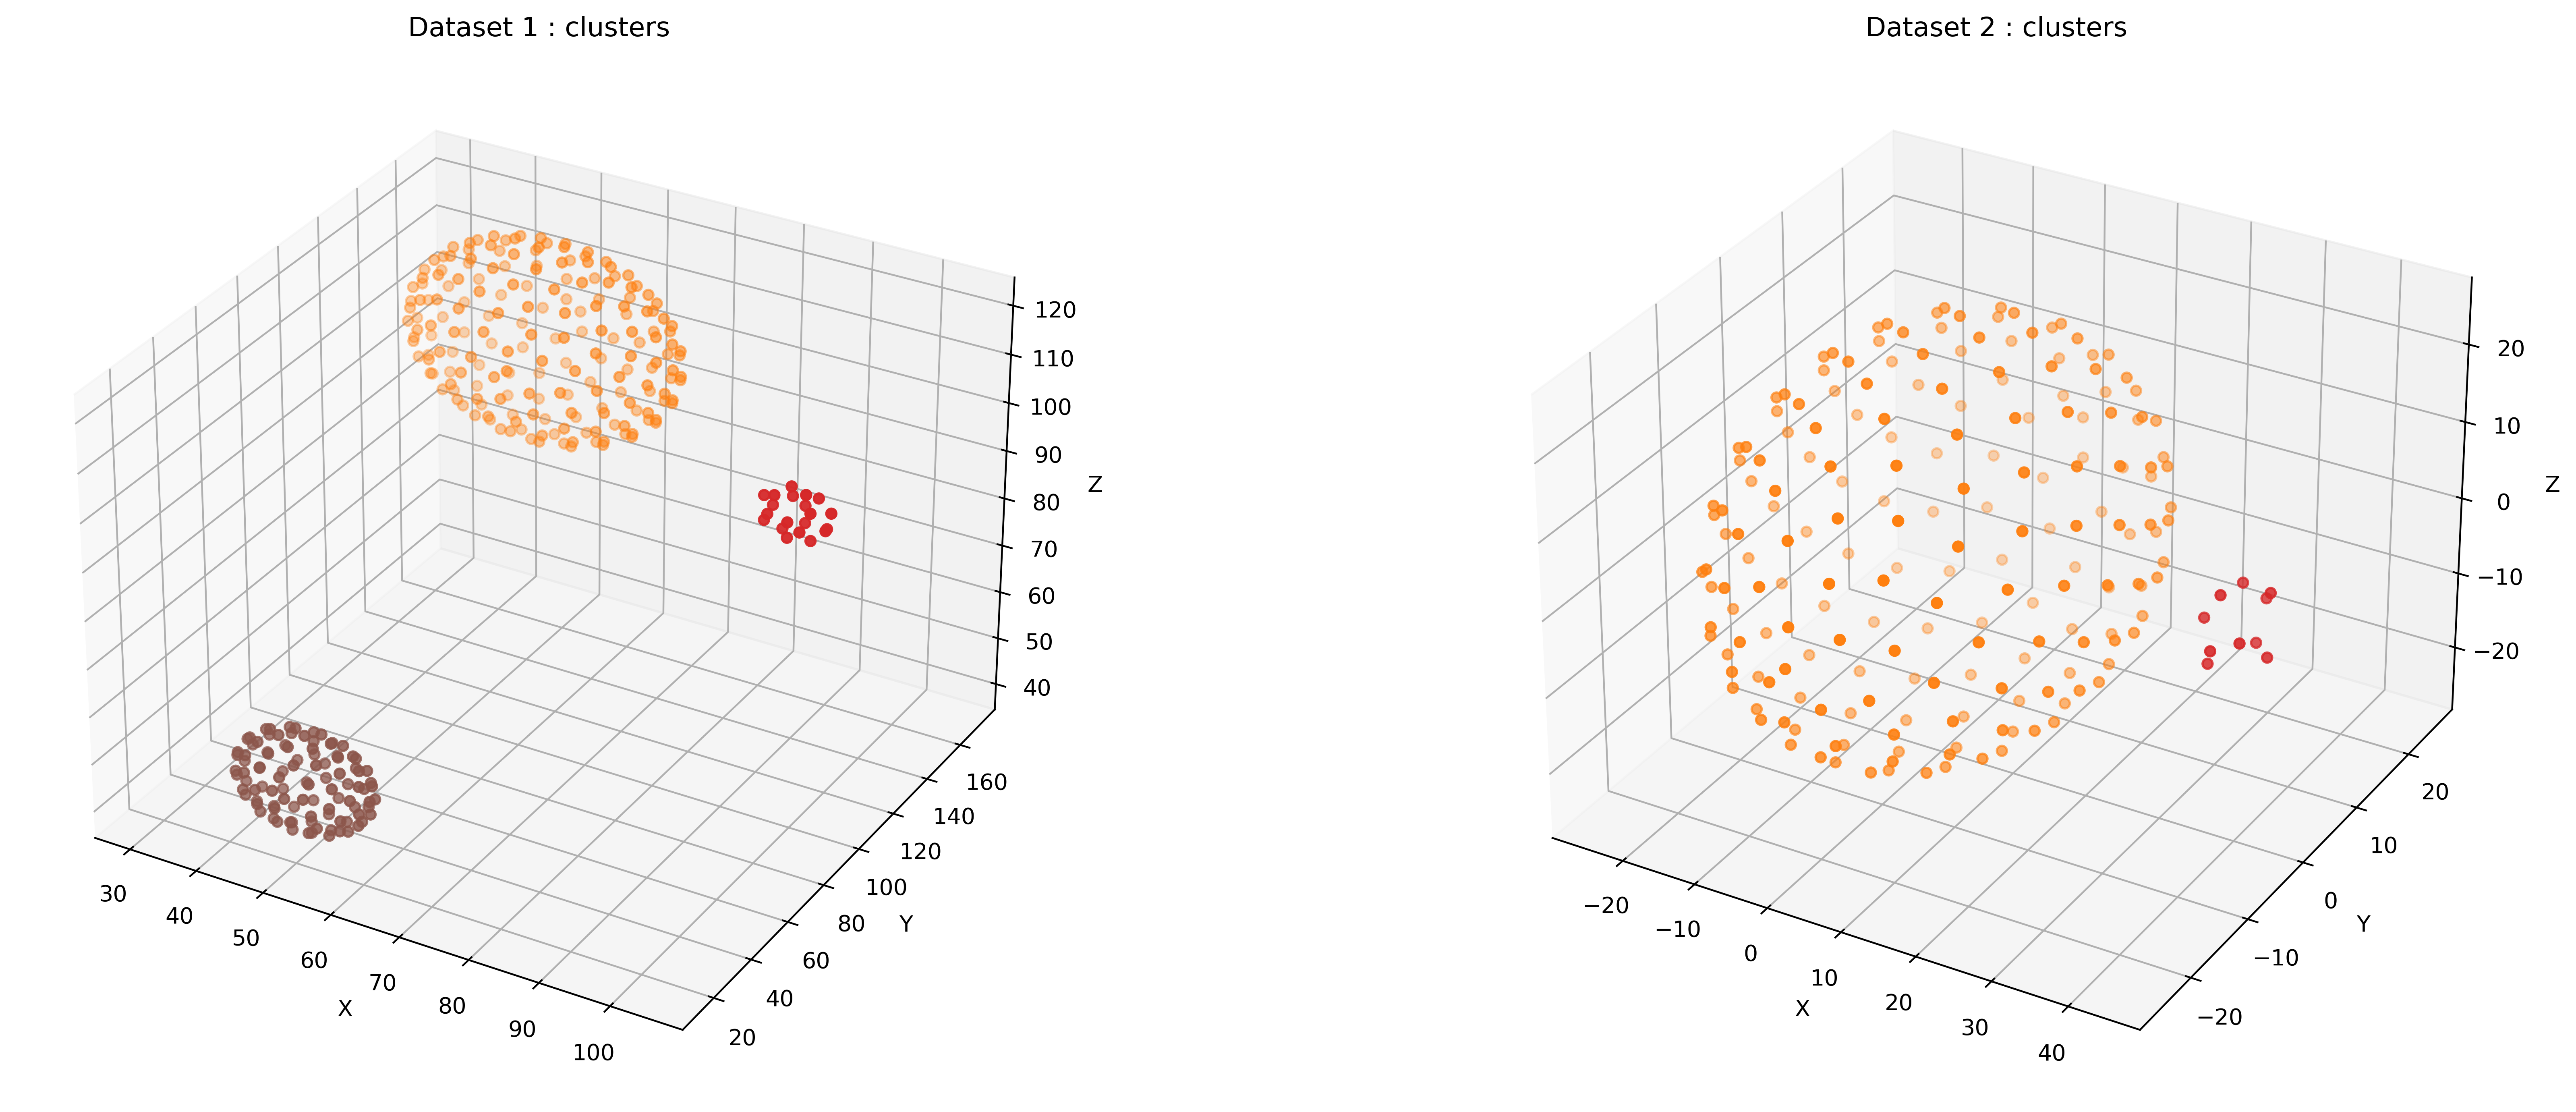

In [12]:
fig = plt.figure( figsize=(20,7), dpi = 400, facecolor = "white" )

ax1 = fig.add_subplot( 121, projection='3d' ); ax1.set_xlabel('X'); ax1.set_ylabel('Y'); ax1.set_zlabel('Z');
ax2 = fig.add_subplot( 122, projection='3d' ); ax2.set_xlabel('X'); ax2.set_ylabel('Y'); ax2.set_zlabel('Z');

legend = []

## Setting the cmap
cmap = plt.cm.get_cmap("tab10")
colors = pd.Series(clusters_df["FINAL_CLUSTER"]+1).map(cmap)
colors2 = pd.Series(clusters_df2["FINAL_CLUSTER"]+1).map(cmap)

ax1.set_title("Dataset 1 : clusters")
ax2.set_title("Dataset 2 : clusters")

## Plotting all data
ax1.scatter(df["x"], df["y"], df["z"], color = colors)
ax2.scatter(df2["x"], df2["y"], df2["z"], color = colors2)

plt.tight_layout()

plt.show()

## Showing selected cluster

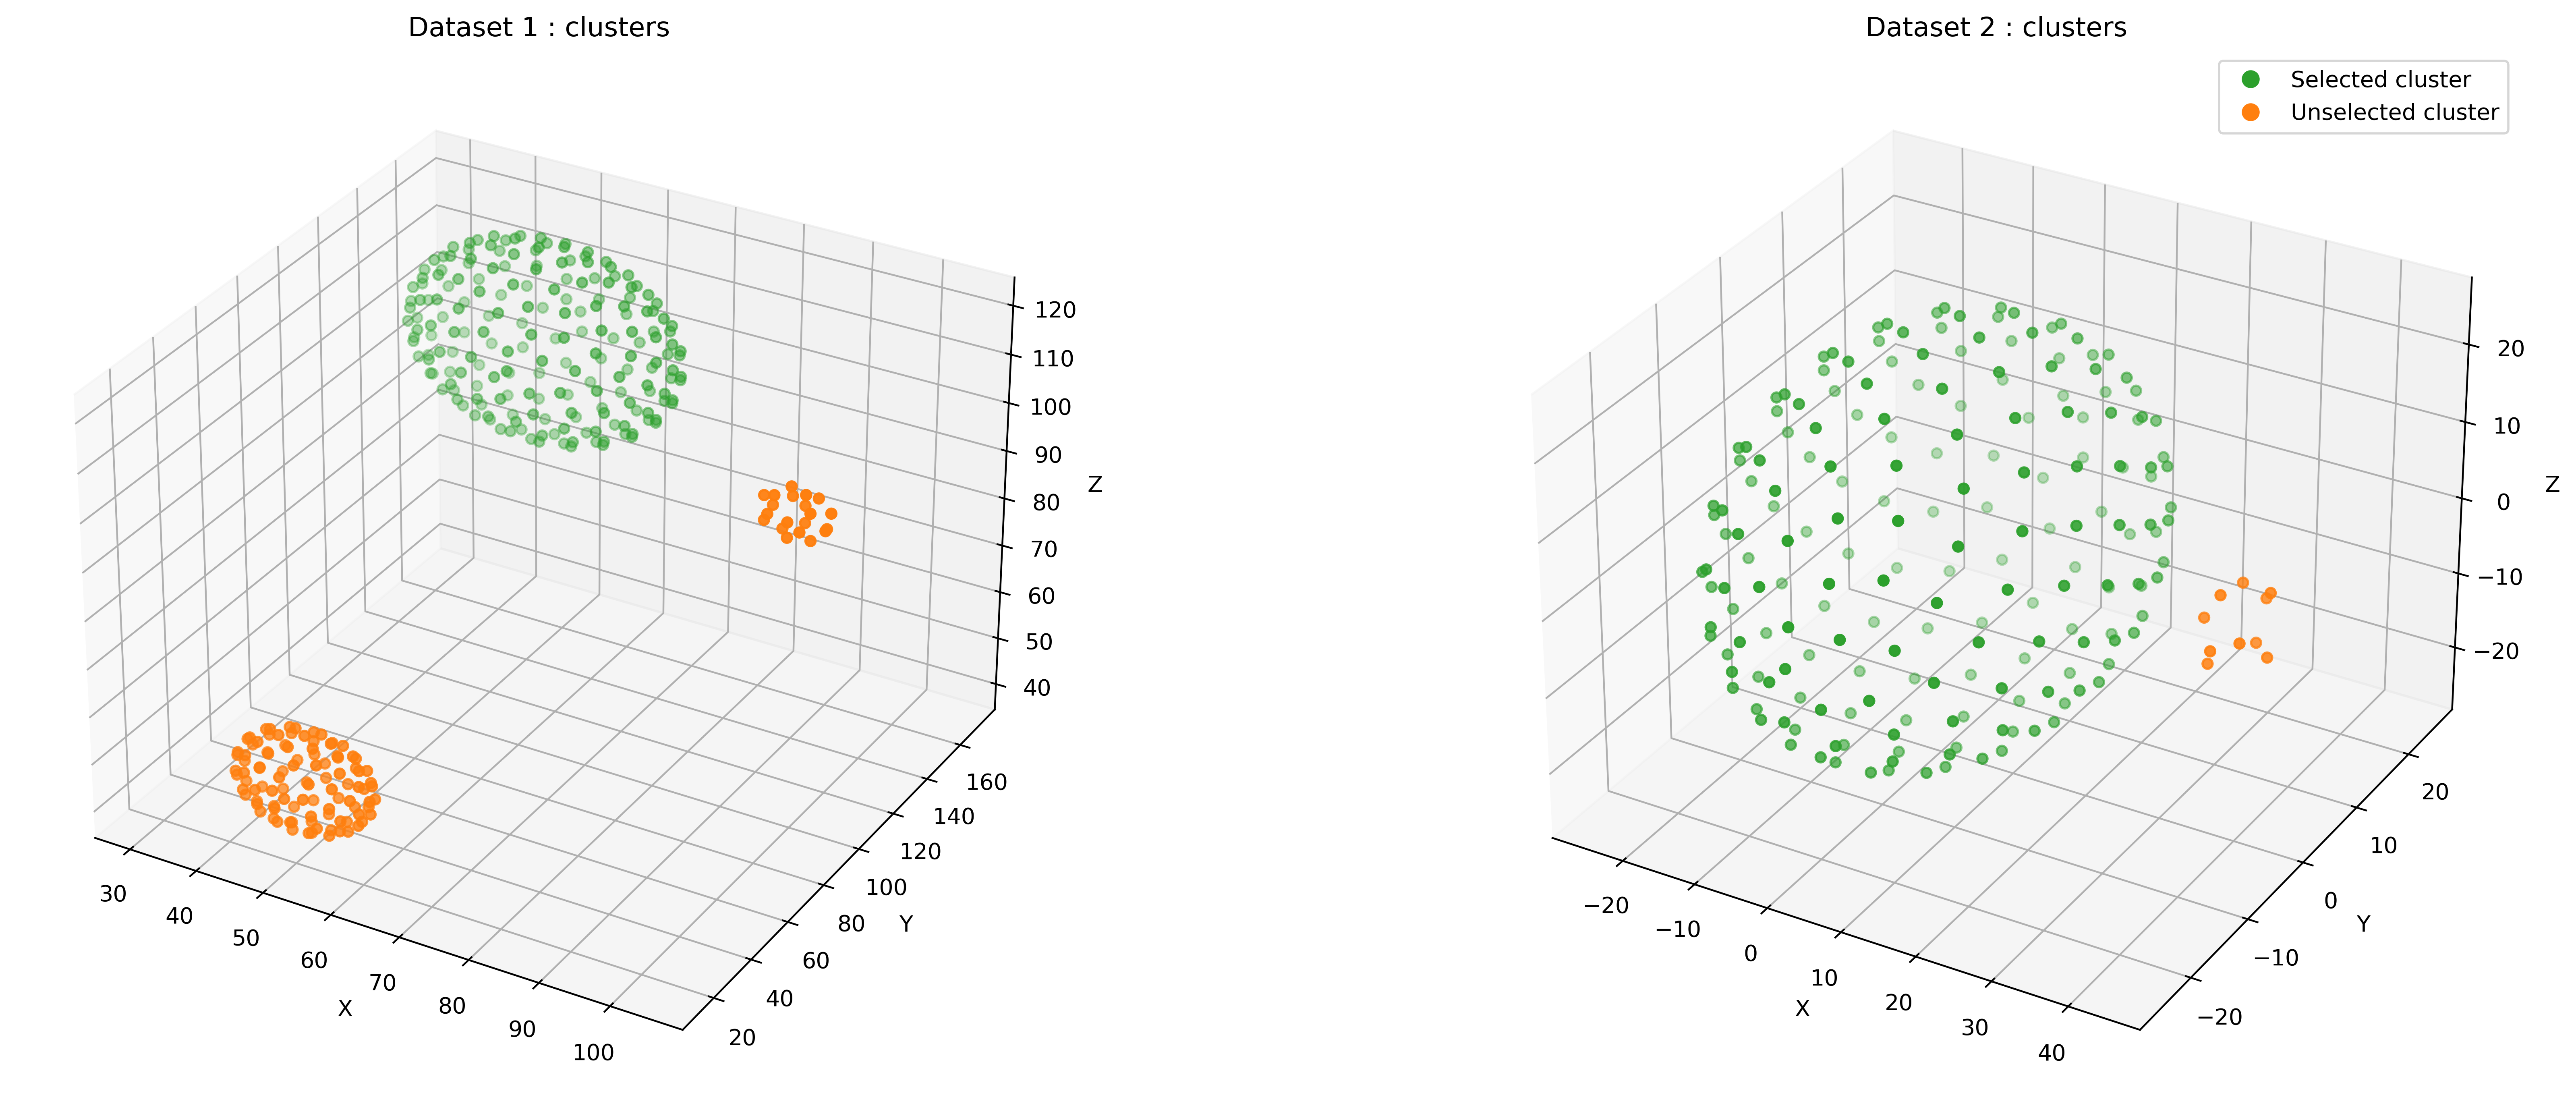

In [5]:
fig = plt.figure( figsize=(20,7), dpi = 400, facecolor = "white" )

ax1 = fig.add_subplot( 121, projection='3d' ); ax1.set_xlabel('X'); ax1.set_ylabel('Y'); ax1.set_zlabel('Z');
ax2 = fig.add_subplot( 122, projection='3d' ); ax2.set_xlabel('X'); ax2.set_ylabel('Y'); ax2.set_zlabel('Z');

## Setting the cmap
cmap = plt.cm.get_cmap("tab10")
colors = pd.Series(clusters_df["CLUSTER_SELECT"]+1).map(cmap)
colors2 = pd.Series(clusters_df2["CLUSTER_SELECT"]+1).map(cmap)

ax1.set_title("Dataset 1 : clusters")
ax2.set_title("Dataset 2 : clusters")

## Plotting all data
ax1.scatter(df["x"], df["y"], df["z"], color = colors)
ax2.scatter(df2["x"], df2["y"], df2["z"], color = colors2)

legend = [Line2D([0], [0], marker = "o", color = cmap(2), label = "Selected cluster", markersize = 7, ls = '')]
legend.append(Line2D([0], [0], marker = "o", color = cmap(1), label = "Unselected cluster", markersize = 7, ls = ''))
plt.legend(handles = legend, loc = 'best')

plt.tight_layout()

plt.show()

# Clustering on distances

In [6]:
from sklearn.cluster import DBSCAN

def dist_clusters(df, coord_column, centroid_method = "gradient"):
        """
        Cluster the spots based on the distance from the centroid.

        Parameters
        ----------
        df : pandas.DataFrame
            Dataframe which contain the coordinates of the spots.
        coord_column : str
            Name of the column which contains the coordinates.
        centroid_method : str, optional
            Method to compute the centroid. Available options are :
                - mean : the mean of spots coordinates on each axis.
                - gradient : gradient slope to reduce the sum of the distances.
                - sampled : random subsampling and median of the mean centroid
                            computed.
            The default is "gradient".

        Returns
        -------
        cluster : pandas.Series
            Series containing the cluster id for each spots.

        """
        ## Computing the centroid according to the method chosen
        if centroid_method == "mean":
            cent_coords = centroid.compute_mean_centroid(df, 
                                                         coord_column)
        elif centroid_method == "gradient":
            cent_coords = centroid.compute_gradient_centroid(df, 
                                                             coord_column)
        elif centroid_method == "sampled":
            cent_coords = centroid.compute_sampled_centroid(df, 
                                                            coord_column)
        
        ## Computing the distances between the centroid and the spots    
        distances = pd.Series([ np.linalg.norm(coords-cent_coords) 
                               for coords in df[coord_column] ], 
                              index = df.index, name = "Distances")
        
        ## Clustering the distances and saving it as a pd.Series
        cluster = DBSCAN(eps=5, min_samples=6).fit_predict(distances.to_frame())
        cluster = pd.Series(cluster, index = df.index, 
                            name = "DIST_CLUSTER", dtype = "int")
        
        return cluster, distances
    
clustersA, distA = dist_clusters(df, "coords", "gradient")
clustersB, distB = dist_clusters(df2, "coords", "gradient")

In [7]:
clustersA[clustersA == 0].tolist()


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

# Showing the results

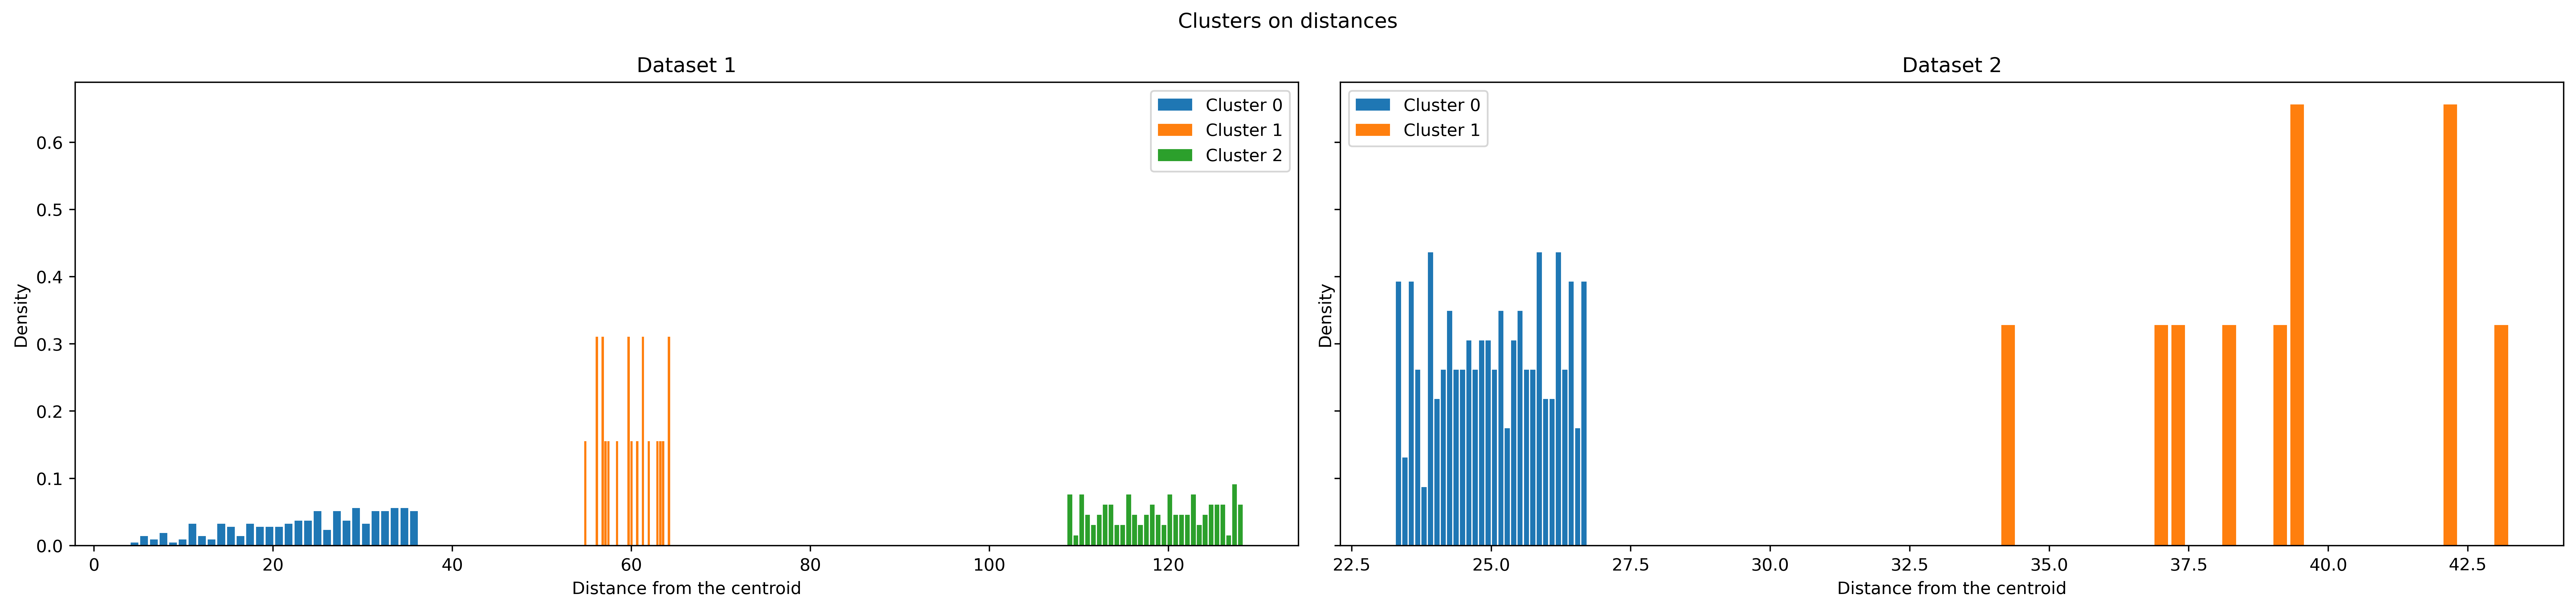

In [8]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True, dpi = 400, figsize = (21, 5), facecolor = "white")
n_bins = 30
fig.suptitle("Clusters on distances")

Clust_ID_A = clustersA.unique()
dist1 = []
for ids in Clust_ID_A:
    indexes = clustersA[clustersA == ids].index 
    dist1.append(distA.loc[indexes].tolist())

Clust_ID_B = clustersB.unique()
dist2 = []
for ids in Clust_ID_B:
    indexes = clustersB[clustersB == ids].index 
    dist2.append(distB.loc[indexes].tolist())


# We can set the number of bins with the *bins* keyword argument.
for k in range(len(dist1)):
    axs[0].hist(dist1[k], bins=n_bins, density = True, histtype='barstacked', rwidth=0.8, label = "Cluster "+str(k))
for k in range(len(dist2)):
    axs[1].hist(dist2[k], bins=n_bins, density = True, histtype='barstacked', rwidth=0.8, label = "Cluster "+str(k))

axs[0].legend()
axs[1].legend()
axs[0].set_title("Dataset 1")
axs[1].set_title("Dataset 2")
axs[0].set_xlabel('Distance from the centroid'); axs[0].set_ylabel('Density')
axs[1].set_xlabel('Distance from the centroid'); axs[1].set_ylabel('Density')
plt.show()
